# Entrega Projeto Final Data Science

Olá! Seja muitíssimo bem vindo à minha entrega final do projeto para a área de estudos de Data Science do Grupo Turing!!!  <br/>
Abaixo, um sumário do que você irá encontrar:

**Sumário**  
&nbsp; ✔ [Conceitos sobre Hockey no Gelo](#Antes..-alguns-conceitos-sobre-Hockey-no-Gelo)
1. [Setup](#1.-Setup)
2. [Web Scraping](#2.-Web-Scraping)
3. [Análise e Visualização de Dados](#3.-Análise-e-Visualização-de-Dados)



##  Antes.. alguns conceitos sobre Hockey no Gelo
&nbsp; ✔  Dimensões da quadra: 60m x 30m  
&nbsp; ✔  Quem faz mais gols ganha  
&nbsp; ✔  6 jogadores p cada time: 1 goleiro, 3 atacantes e 2 zagueiros  
&nbsp; ✔  3 tempos de 20 minutos  
&nbsp; ✔  Rolam várias brigas  
&nbsp; ✔  Eu se jogasse hockey:

<img src='https://media2.giphy.com/media/d2S0hB0KSrQaONLchJ/giphy.gif?cid=ecf05e47jmuxdkuryu98syqg7p8mvxj1qrhoot59im00fxxa&rid=giphy.gif' height="100%" width="400" style="margin-left: auto;margin-right: auto">

## 1. Setup

Iremos importar as bibliotecas necessárias e definir o estilo para nossos gráficos. As versões usadas estão no arquivo `requirements.txt`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

import bar_chart_race as bcr

%matplotlib inline

plt.style.use('ggplot')

## 2. Web Scraping

Para exemplificar, começaremos fazendo um request para apenas a primeira página do site em questão. Vamos pegar o texto dessa resposta e atribuir à variável `source`:

In [71]:
source = requests.get('https://scrapethissite.com/pages/forms/?page_num=1').text

Em seguida, usaremos o BreautifulSoup para identificar a informação que queremos. Nesse caso, estamos indo atrás da tag `<table ...>`. Você pode retirar o comentário do print para visualizar o código HTML da página (cuidado, são muitas linhas kkk).

In [72]:
soup = BeautifulSoup(source, 'lxml')
# print(soup.prettify)

In [73]:
table = soup.find_all('table')
# print(table)

O pandas possui uma função que lê html e transforma em dataframe. Como feito abaixo:

In [74]:
df_test = pd.read_html(str(table))[0]
df_test.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


As linhas anteriores serviram apenas para a primeria página, mas e as 23 demais? Para as outras, criaremos uma função para fazer o scrapping de mais de uma página. Iremos apenas repetir os passos anteriores, mas iterando sobre as páginas.

In [76]:
def scrape_table(url, page_nums):
    df = []
    
    for i in range(1, page_num + 1):
        source = requests.get(url[:-1] + str(i)).text
        soup = BeautifulSoup(source, 'lxml')
        table = soup.find_all('table')
        df.append(pd.read_html(str(table))[0])

    df = pd.concat(df, ignore_index = True)
    return df

In [77]:
df = scrape_table(url = 'https://scrapethissite.com/pages/forms/?page_num=1', page_nums = 24)

Farei um `df.tail()` como um sanity check

In [84]:
df.tail()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
577,Tampa Bay Lightning,2011,38,36,8.0,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10.0,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9.0,0.622,249,198,51
580,Washington Capitals,2011,42,32,8.0,0.512,222,230,-8
581,Winnipeg Jets,2011,37,35,10.0,0.451,225,246,-21


Parece estar tudo ok. Salvaremos o dataset no arquivo `data/hockey_teams.csv`.

In [86]:
df.to_csv("data/hockey_teams.csv",index = False)

## 3. Análise e Visualização de Dados
Com o scrapping pronto, vamos unir este dataset com o fornecido (`DataSet ESPN.csv`) para finalmente começarmos nossa análise de dados!!!

Irei farei um inner join das duas tabelas para reunir os dados em um único dataframe e facilitar a análise:

In [7]:
df1 = pd.read_csv('data/hockey_teams.csv')

In [8]:
df1.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [9]:
df2 = pd.read_csv('data/DataSet ESPN.csv', index_col = 'Unnamed: 0')

In [10]:
# Para o join dar certo nas colunas que queremos, irei renomear a coluna "Team" para "Team Name" no df2
df2.columns = ['Team Name', 'Home Games', 'Home Total', 'Home Average', 'Road Games',
       'Road Average', 'Overall Games', 'Overall Average', 'Year',
       'Save Percentage', 'Penalty Minutes', 'Penalty Minutes Against']

In [11]:
df2.head()

,Team Name,Home Games,Home Total,Home Average,Road Games,Road Average,Overall Games,Overall Average,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against
0,Montreal Canadiens,41,"824,308","20,105",41,"16,013",82,"18,059",2001,0.899,1020,1294
1,Detroit Red Wings,41,"819,795","19,995",41,"17,889",82,"18,942",2001,0.909,1082,1072
2,Philadelphia Flyers,41,"802,595","19,575",41,"17,182",82,"18,378",2001,0.903,1183,1332
3,St Louis Blues,41,"800,319","19,519",41,"16,898",82,"18,209",2001,0.899,1345,1366
4,Toronto Maple Leafs,41,"789,567","19,257",41,"17,172",82,"18,215",2001,0.908,1430,1243


Finalmente, o Inner join:

In [12]:
df = pd.merge(df1, df2, how = 'inner', on = ['Team Name', 'Year'])

Agora, podemos seguir com nossa análise em um único dataframe!

Vantagens desse join:
  - Facilita na hora de cruzar os dados

Desvantagens:
  - O ano de 2004 e 2005 ficam faltando, pois em df1 falta 2004 e df2 falta 2005.

In [13]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -,Home Games,Home Total,Home Average,Road Games,Road Average,Overall Games,Overall Average,Save Percentage,Penalty Minutes,Penalty Minutes Against
0,Mighty Ducks of Anaheim,2001,29,42,3.0,0.354,175,198,-23,41,"553,470","13,499",41,"16,645",82,"15,072",0.899,1136,1042
1,Boston Bruins,2001,43,24,9.0,0.524,236,201,35,41,"632,746","15,432",41,"16,462",82,"15,947",0.886,1325,1384
2,Buffalo Sabres,2001,35,35,1.0,0.427,213,200,13,41,"731,438","17,839",41,"16,168",82,"17,004",0.916,1249,1279
3,Calgary Flames,2001,32,35,3.0,0.390,201,220,-19,41,"681,535","16,622",41,"16,504",82,"16,563",0.894,1376,1564
4,Carolina Hurricanes,2001,35,26,5.0,0.427,217,217,0,41,"547,584","13,355",41,"15,575",82,"14,465",0.898,1083,1136


A primeira coisa que farei, é um `df.info()`. Para ver as informações mais gerais do dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Team Name                237 non-null    object 
 1   Year                     237 non-null    int64  
 2   Wins                     237 non-null    int64  
 3   Losses                   237 non-null    int64  
 4   OT Losses                237 non-null    float64
 5   Win %                    237 non-null    float64
 6   Goals For (GF)           237 non-null    int64  
 7   Goals Against (GA)       237 non-null    int64  
 8   + / -                    237 non-null    int64  
 9   Home Games               237 non-null    int64  
 10  Home Total               237 non-null    object 
 11  Home Average             237 non-null    object 
 12  Road Games               237 non-null    int64  
 13  Road Average             237 non-null    object 
 14  Overall Games            2

Repare que ao fazermos `df.info()` algumas colunas estão como object e deveriam ser inteiros (como a `'Home Total'`). Isso se deve porque o separador dos milhares usado nessas colunas é `,`. Devemos então substituir esses separadores e transformar em inteiros:

In [15]:
df['Home Total'] = df['Home Total'].str.replace(',','').astype('int')
df['Home Average'] = df['Home Average'].str.replace(',','').astype('int')
df['Road Average'] = df['Road Average'].str.replace(',','').astype('int')
df['Overall Average'] = df['Overall Average'].str.replace(',','').astype('int')

Com essa parte dos dados limpos, veremos se há algum dado faltante nesse período ou se há algum valor muito distoante. Lembre que com o join, nosso período agora é de 2001 até 2011.

In [16]:
df.isna().sum()

Team Name                  0
Year                       0
Wins                       0
Losses                     0
OT Losses                  0
Win %                      0
Goals For (GF)             0
Goals Against (GA)         0
+ / -                      0
Home Games                 0
Home Total                 0
Home Average               0
Road Games                 0
Road Average               0
Overall Games              0
Overall Average            0
Save Percentage            0
Penalty Minutes            0
Penalty Minutes Against    0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,237.0,2006.278481,3.420787,2001.000,2003.000,2007.000,2009.000,2011.000
Wins,237.0,39.392405,7.771773,20.000,34.000,41.000,45.000,54.000
Losses,237.0,31.088608,7.003976,15.000,26.000,30.000,35.000,48.000
OT Losses,237.0,7.915612,3.504423,0.000,5.000,8.000,10.000,18.000
Win %,237.0,0.480371,0.094828,0.244,0.415,0.500,0.549,0.659
Goals For (GF),237.0,227.240506,26.168885,164.000,210.000,226.000,246.000,318.000
Goals Against (GA),237.0,225.852321,27.534095,164.000,207.000,225.000,244.000,303.000
+ / -,237.0,1.388186,39.312540,-113.000,-27.000,6.000,29.000,85.000
Home Games,237.0,40.962025,0.231596,40.000,41.000,41.000,41.000,42.000
Home Total,237.0,696997.708861,89496.423737,453456.000,634381.000,698077.000,763830.000,912155.000


In [18]:
df.describe(include='object')

,Team Name
count,237
unique,27
top,Vancouver Canucks
freq,9


## Heatmap e correlação entre as variáveis

In [19]:
m_corr = df.corr()

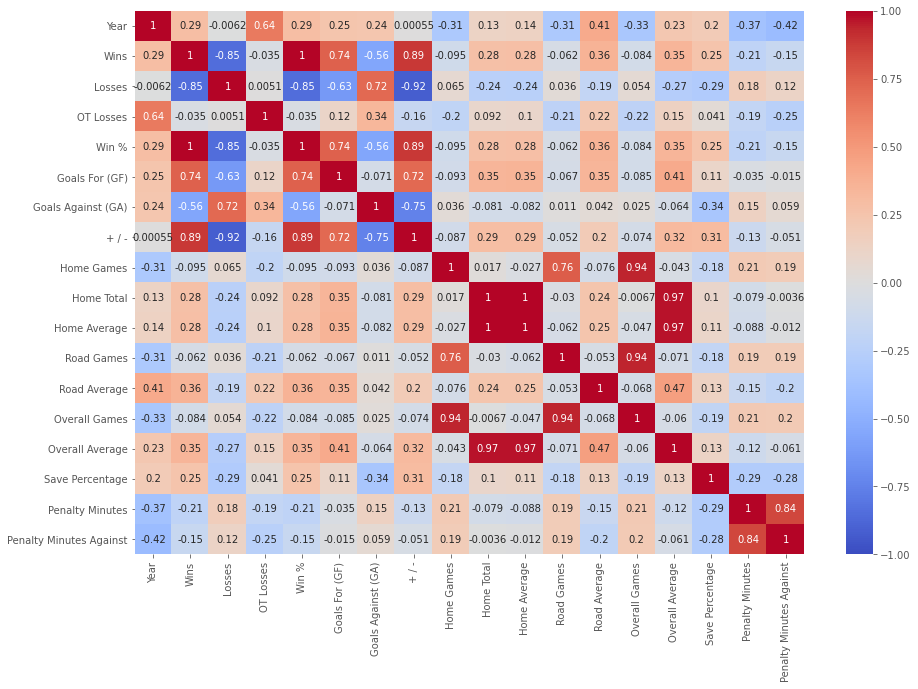

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(m_corr, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm')
plt.show()

## Vitórias acumuladas ao longo do tempo

A primeira coisa que me veio a cabeça foi ver qual time acumulou mais vitórias ao longo do tempo. Para isso, fiz um bar chart race. Caso não consiga rodar a célula, o vídeo esta no arquivo `vitorias_acumuladas.mp4`.

In [21]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [22]:
# Deixando os dados no formato em que a biblioteca recomenda
df_race = pd.pivot_table(df, values='Wins', index=['Year'], columns=['Team Name'], aggfunc=np.sum)
df_race = df_race.cumsum()

In [71]:
# "Plotando" bar chart race
bcr.bar_chart_race(
    df=df_race,
    filename=None,
    orientation='h',
    sort='desc',
    n_bars=9,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=100,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .90, 'y': .23,
                                      's': f'Ano:',
                                      'ha': 'right', 'size': 11},
    period_length=2000,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Vitórias acumuladas ao longo do tempo',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors = True) 

/home/diego/anaconda3/envs/gt-final-datascience/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/diego/anaconda3/envs/gt-final-datascience/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


De cara, vemos que o Detroid Red Wings foi o que mais acumulou vitórias desde o começo!

## Análise das demais variáveis + O que destaca o Detroit Red Wings dos demais times?

Seguiremos fazendo uma análise da relação entre as variáveis. Para fins de comparanção, iremos destacar os data points do Detroit Red Wings, para ver se ele se destaca.

### Gols Marcados x Vitórias

In [23]:
detroit_index = df[df['Team Name'] == 'Detroit Red Wings'].index

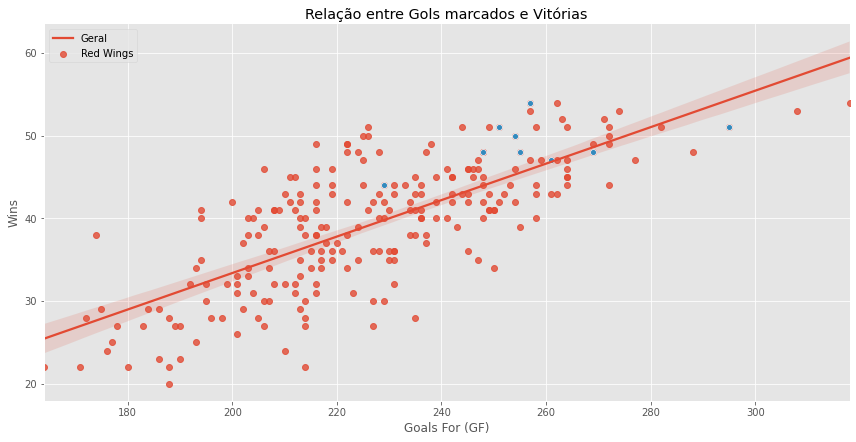

In [24]:
sns.lmplot(data = df, x = 'Goals For (GF)', y = 'Wins', height=6, aspect=2)
sns.scatterplot(data = df.iloc[detroit_index], x = 'Goals For (GF)', y = 'Wins')

plt.title('Relação entre Gols marcados e Vitórias')
plt.legend(['Geral', 'Red Wings'])

plt.show()

No gráfico acima, claramente há uma relação positiva entre o número de gols marcados e o número de vitórias. OBS: Red Wings em azul.

### Gols tomados x Vitórias

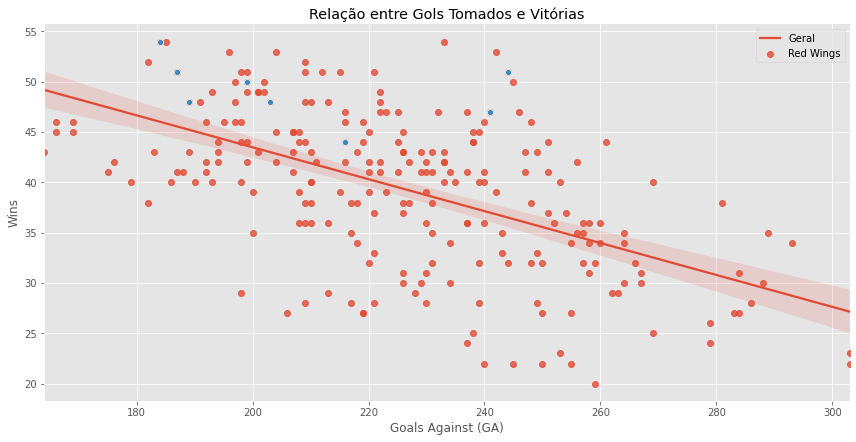

In [25]:
sns.lmplot(data = df, x = 'Goals Against (GA)', y = 'Wins', height=6, aspect=2)
sns.scatterplot(data = df.iloc[detroit_index], x = 'Goals Against (GA)', y = 'Wins')

plt.title('Relação entre Gols Tomados e Vitórias')
plt.legend(['Geral', 'Red Wings'])

plt.show()

Há uma relação negativa entre os gols tomados e as vitórias. Note que nos dois exemplos, os red wings se posicionaram em regiões mais "fvoráveis". Ou seja, aquelas nas quais eles marcavam mais gols, tomavam menos gols e ganhavam mais.

Na tabela abaixo, de fato conseguimos ver isso. Detroid possui a maior média de % de vitórias, juntamente com a maior média de gols feitos, e quase a menor média de gols tomados!

In [51]:
df.groupby('Team Name')[['Win %','Wins','Losses', 'Goals For (GF)', 'Goals Against (GA)']].mean().sort_values('Win %', ascending = False)

,Win %,Wins,Losses,Goals For (GF),Goals Against (GA)
Team Name,,,,,
Detroit Red Wings,0.597556,49.000000,21.777778,257.666667,207.333333
Vancouver Canucks,0.565222,46.333333,25.777778,246.333333,206.000000
San Jose Sharks,0.555444,45.555556,25.111111,239.777778,206.111111
New Jersey Devils,0.555444,45.555556,27.444444,213.777778,192.555556
Boston Bruins,0.519000,42.555556,27.444444,235.111111,214.444444
Ottawa Senators,0.512111,42.000000,29.444444,244.444444,223.666667
Dallas Stars,0.508111,41.666667,28.444444,225.222222,214.111111
Philadelphia Flyers,0.501333,41.111111,28.444444,239.888889,222.000000
Nashville Predators,0.493111,40.444444,30.666667,221.222222,217.333333


### Fãs

...


### Penalidades

Nunca assiti Hockey no gelo, mas em minhas pesquisas reparei que tem muitas tretas! O quanto será que isso impacta nas vitórias do time? Será que quanto mais porradaria, melhor o time performa?

Vamos medir isso a partir dos minutos de penalidade que o time levou e sofreu.

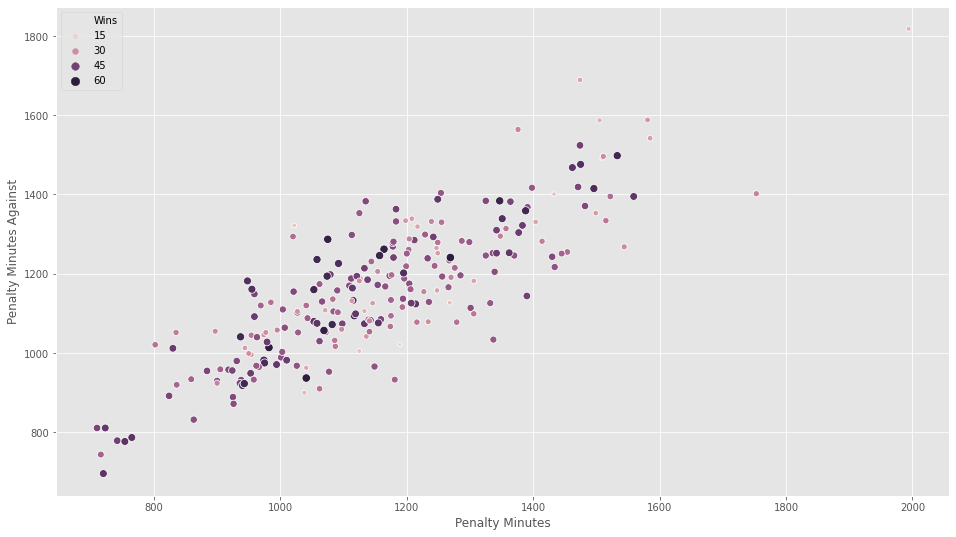

In [67]:
plt.figure(figsize = (16,9))
sns.scatterplot(data = df, x = 'Penalty Minutes', y = 'Penalty Minutes Against', size = 'Wins', hue = 'Wins')
plt.show()

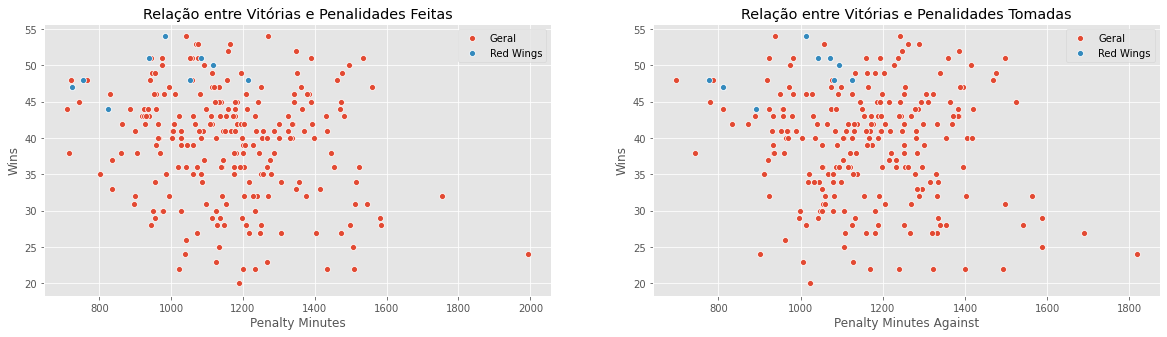

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))

sns.scatterplot(data = df, x = 'Penalty Minutes', y = 'Wins', ax = ax1)
sns.scatterplot(data = df.iloc[detroit_index], x = 'Penalty Minutes', y = 'Wins', ax = ax1)
ax1.set_title('Relação entre Vitórias e Penalidades Feitas')

ax1.legend(['Geral', 'Red Wings'])

sns.scatterplot(data = df, x = 'Penalty Minutes Against', y = 'Wins', ax = ax2)
sns.scatterplot(data = df.iloc[detroit_index], x = 'Penalty Minutes Against', y = 'Wins', ax = ax2)
ax2.set_title('Relação entre Vitórias e Penalidades Tomadas')

ax2.legend(['Geral', 'Red Wings'])

plt.show()

Não me parece haver uma relação muito clara entre as penalidades e o número de vitórias. Mas algo que se destaca, são os baixos valores das penalidades para o time do Detroit Red Wings.